### Dimensionality Reduction 2 PCA

Week 11, Day 51, 2  

Jay Urbain, PhD

#### Objectives  
- Students understand the curse of dimensionality and the motivation for dimensionality reduction  
- Students can apply basic unsupervised feature selection methods, such as high sparsity, low variance, and high correlation, to a dataset  
- **Students can explain the underlying theory of PCA and ICA and how the techniques can be used for dimensionality reduction**  
- **Students can compare PCA and ICA and evaluate the suitability of each technique for a given context**  
- **Students can apply PCA and ICA to a dataset to reduce its dimensionality**   

#### References    

- Lindsay I. Smith, A tutorial on Principal Components Analysis, February 26, 2002.
http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf

- NIST Digit Classification: Principal Components Analysis  
https://charlesreid1.github.io/circe/Digit%20Classification%20-%20PCA.html

- Jake VanderPlas, Python Data Science Handbook, Essential Tools for Working with Data, 2016.   
http://shop.oreilly.com/product/0636920034919.do

- Jason Brownlee, Basics of Linear Algebra for Machine Learning   
https://machinelearningmastery.com/linear_algebra_for_machine_learning/

- Sebastian Raschka, Principal Component Analysis in 3 Simple Steps  
https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

- A Beginner's Guide to Eigenvectors, Eigenvalues, PCA, Covariance and Entropy  
https://skymind.ai/wiki/eigenvector
 

### Dimensionality reduction using linear transformations

Linear transformation algorithms for dimensionality reduction seek to *transform* (or project) data from a high-dimensional feature space to a lower-dimensionality feature space while capturing as much information in the data as possible.  

Common techniques include:   
- PCA (Principal Component Analysis)  
- ICA (Independent Component Analysis) 

Both PCA and ICA try to find a set of vectors, a basis, defining a new feature space for the data. So you can write any point (vector) in your data as a linear combination of the basis.

In PCA, the basis is the one in which each vector captures the largest possible variance in the data subject to the vectors being orthogonal.

In ICA, the basis is the one in which each vector is an independent component of your data, you can think of your data as a mix of signals. The ICA basis will have a vector for each independent signal.


### Principal Component Analysis      

PCA uses an orthogonal linear transformation to convert a dataset of possibly correlated features into a set of linearly uncorrelated variables called *principal components*. 

This transformation is defined in such a way that the first principal component has the largest possible variance, and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. 

The resulting vectors, each being a linear combination of the variables and containing $n$ observations are an uncorrelated orthogonal basis set. 


### PCA Algorithm:   

1 - Standardize the data to zero mean and unit variance.

PCA is sensitive to the relative scaling of the original variables.

$$
z={x-\mu  \over \sigma }
$$

2 - Compute the [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix) using each pair of features.

The formula for covariance is very similar to the formula for variance:

$$
var(X)=\dfrac{\sum_{i=1}^{m} (X_i-\bar X)(X_i-\bar X)}{n-1}
$$

Simply expand the square term to show both parts:

$$
cov(X, Y)=\dfrac{\sum_{i=1}^{m} (X_i-\bar X)(Y_i-\bar Y)}{n-1}
$$

The covariance matrix for a set of data with $n$ dimensions is:

$$C^{n x n}=(c_{i,j}, c_{i,j} = cov(Dim_i, Dim_j))$$

where $C^{n x n}$ is a matrix with $n$ rows and $n$ columns, and $Dim_x$ is the $x^th$ dimension.

For example, the covariance matrix for a 3D data set, using the dimensions $x$, $y$, and $z$.

$$
C=\begin{vmatrix}
cov(x,x)&cov(x,y)&&cov(x,z)\\
cov(y,x)&cov(y,y)&&cov(y,z)\\
cov(z,x)&cov(z,y)&&cov(z,z)\\
\end{vmatrix}
$$

3 - Compute the [Eigenvalues and Eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of the covariance matrix.

Eigen decomposition of a matrix is a type of decomposition that involves decomposing a square matrix into a set of eigenvectors and eigenvalues.

A vector is an eigenvector of a matrix if it satisfies the following equation:

$$
A \cdot v = \lambda \cdot v
$$

This is called the eigenvalue equation.
- A is the parent square matrix that we are decomposing 
- v is the eigenvector of the matrix 
- $\lambda$ represents the eigenvalue scalar

A matrix could have one eigenvector and eigenvalue for each *dimension* of the parent matrix. 

Not all square matrices can be decomposed into eigenvectors and eigenvalues, and some can only be decomposed in a way that requires complex numbers. The parent matrix can be shown to be a product of the eigenvectors and eigenvalues.

$$
A=Q \cdot diag(V) \cdot Q^{-1}
$$

- $Q$ is a matrix comprised of the eigenvectors  
- $diag(V)$ is a diagonal matrix comprised of the eigenvalues along the diagonal (sometimes represented with a capital lambda, $\Lambda$)  
- $Q^{-1}$ is the inverse of the matrix comprised of the eigenvectors

A decomposition operation does not result in a compression of the matrix. It breaks it down into constituent parts to make certain operations on the matrix easier to perform. Like other matrix decomposition methods, Eigendecomposition is used as an element to simplify the calculation of other more complex matrix operations. 

https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors

4 - Use the Eigenvalues and Eigenvectors to select only the most important feature vectors. 

Sort Eigenvalues in descending order and choose the $k$ Eigenvectors that correspond to the $k$ largest Eigenvalues, where $k$ is the number of dimensions of the new feature subspace where $k≤d$.

Construct the projection (transformation) matrix $W$ from the selected $k$ eigenvectors.

5 - Transform your data onto the vectors in the reduced dimensionality feature space.

Transform the original dataset $X$ via $W$ to obtain a $k-dimensional$ feature subspace $Y$.


### Manually computing PCA

Principal Component Analysis step-by-step using NumPy functions.

In [0]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print('A matrix')
print(A)

# calculate the mean of each column
M = mean(A.T, axis=1)
print('M mean')
print(M)

# center columns by subtracting column means
C = A - M
print('C mean centered by column')
print(C)

# calculate covariance matrix of centered matrix
V = cov(C.T)
print('V covariance')
print(V)

# eigendecomposition of covariance matrix
values, vectors = eig(V)
print('Eigenvectors')
print(vectors)
print('Eigenvalues')
print(values)

# project data
P = vectors.T.dot(C.T)
print('P.T projection of the original matrix')
print(P.T)

A matrix
[[1 2]
 [3 4]
 [5 6]]
M mean
[3. 4.]
C mean centered by column
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]
V covariance
[[4. 4.]
 [4. 4.]]
Eigenvectors
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Eigenvalues
[8. 0.]
P.T projection of the original matrix
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


### PCA Intuition

PCA can be illustrated by visualizing a two-dimensional dataset. Consider the following 100 points:

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

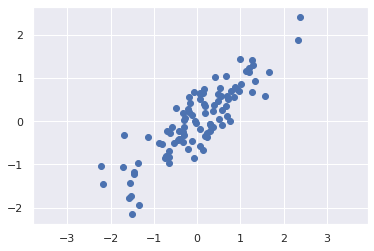

In [0]:
rng = np.random.RandomState(99)
X = np.dot(rng.rand(2, 2), rng.randn(2, 100)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

From the plot above, it is clear that there is a near linear relationship between the $x$ and $y$ variables. 

Unlike linear regression where we try to predict the $y$ values from the $x$ values, unsupervised learning problems attempt to learn about the *relationship* between the $x$ and $y$ values.

In PCA, this relationship is quantified by finding a list of the principal axes (Eigenvectors) in the data, and using those axes to describe the dataset. 

Using Scikit-Learn's PCA estimator, we can compute these principal axes as follows:

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The fit learns some quantities from the data, most importantly the "components"  and "explained variance".


In [0]:
print(pca.components_)

[[ 0.74502203  0.66703987]
 [-0.66703987  0.74502203]]


In [0]:
print(pca.explained_variance_)

[1.3871513  0.09873891]


To see what these numbers mean, we can visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

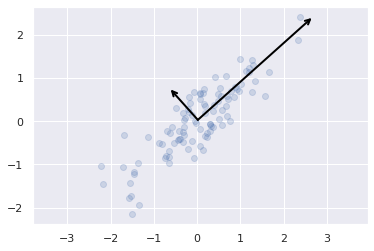

In [0]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color="black",
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');


These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data. More precisely, it is a measure of the variance of the data when projected onto that axis. 

The projection of each data point onto the principal axes are the "principal components" of the data.

The principal components can be plotted along with the original data.

[(-3, 3.1),
 Text(0, 0.5, 'component 2'),
 (-5, 5),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

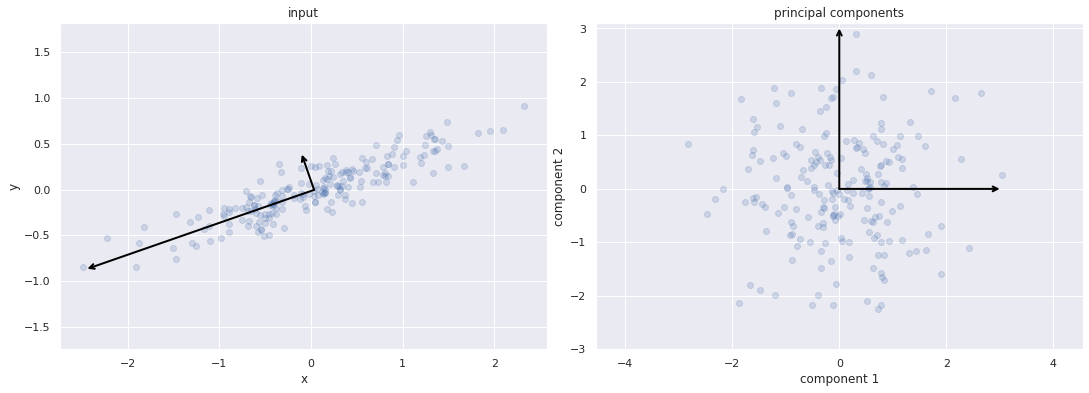

In [0]:
from sklearn.decomposition import PCA
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color="black",
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

#fig.savefig('figures/05.09-PCA-rotation.png')


This transformation from data axes to principal axes is an [affine transformation](https://en.wikipedia.org/wiki/Affine_transformation) which means it is composed of a linear transformation: translation, rotation, and uniform scaling.


### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [0]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

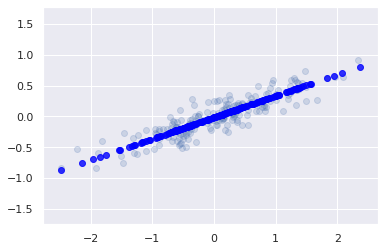

In [0]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color="blue")
plt.axis('equal');

### PCA for hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data. 

Start by loading the digits dataset:

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

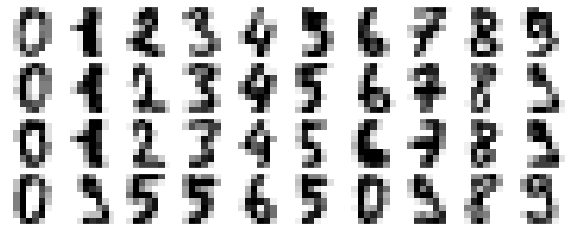

In [0]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

The data consists of $8×8$ pixel images, meaning that they are $64-dimensional$. To gain some intuition into the relationships between these points, we can use `PCA` to project them to a more manageable number of dimensions, for example, two:

In [0]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

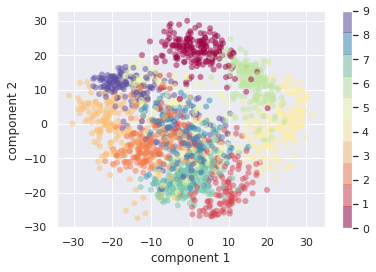

In [0]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

The full data is a $64-dimensional$ point cloud, and these points are the projection of each data point along the directions with the largest variance. 

Essentially, PCA has found the optimal stretch and rotation in $64-dimensional$ space that allows us to see the layout of the digits in two dimensions, and has done this in an *unsupervised*  manner.

The plot above shows just how powerful PCA is in learning the underlying structure of the dataset without using any labels whatsoever—even with just two dimensions, we can start meaningfully separating the images by the digits they display.

Not only does PCA help separate data so that we can discover hidden patterns more readily, it also helps reduce the size of the feature set, making it less costly—both in time and in computational resources—to train machine learning models.

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset. 

The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series. 

### Perform inverse transform

In [0]:
inverse = pca.inverse_transform(projected)

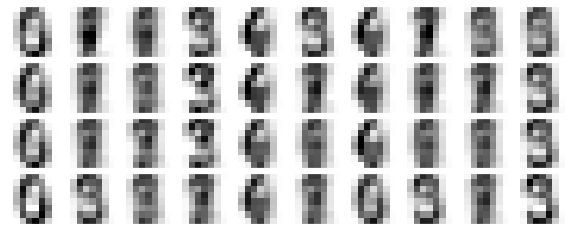

In [0]:
plot_digits(inverse)

### Choosing the number of components
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

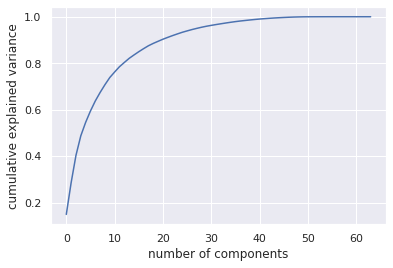

In [0]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Experiments:

Identify the number of principal components you need on the digits data set to accurately identify digits (by a human ;-)



### Breast Cancer Wisconsin (Diagnostic) Data Set

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data   

Preliminary analysis is provided below 

1) Select a basic classifier and build a model on the breast cancer wisconsin dataset.  Record the confusion matrix.

2) Apply PCA to the features in the dataset, not the target value.   

3) Identify the number of principal components required to explain 90% of the data.    

4) Compare the results with your original model.  
      

In [0]:
import pandas as pd
from IPython.display import HTML

df = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/breast-cancer-wisconsin-data.csv")
HTML(df.to_html())
print(df.shape)
print(df.dtypes)
df.head(n=3)

(569, 33)
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


The id and Unnamed: 32 columns should be removed, since they are unnecessary. The dataset will be also examined for missing values, duplicated entries and unique values of 'diagnosis' column.

In [0]:
# Remove unnecessary columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [0]:
# Find missing values
print('Missing values:\n{}'.format(df.isnull().sum()))

# Find duplicated records
print('\nNumber of duplicated records: {}'.format(df.duplicated().sum()))

# Find the unique values of 'diagnosis'.
print('\nUnique values of "diagnosis": {}'.format(df['diagnosis'].unique()))

Missing values:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Number of duplicated records: 0

Unique values of "diagnosis": ['M' 'B'

There are no missing values or duplicated records. Next the diagnosis distribution is checked.



#### Data exploration

In [0]:
# Generate statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Plot pairwise relationships to check the correlations between the mean features.

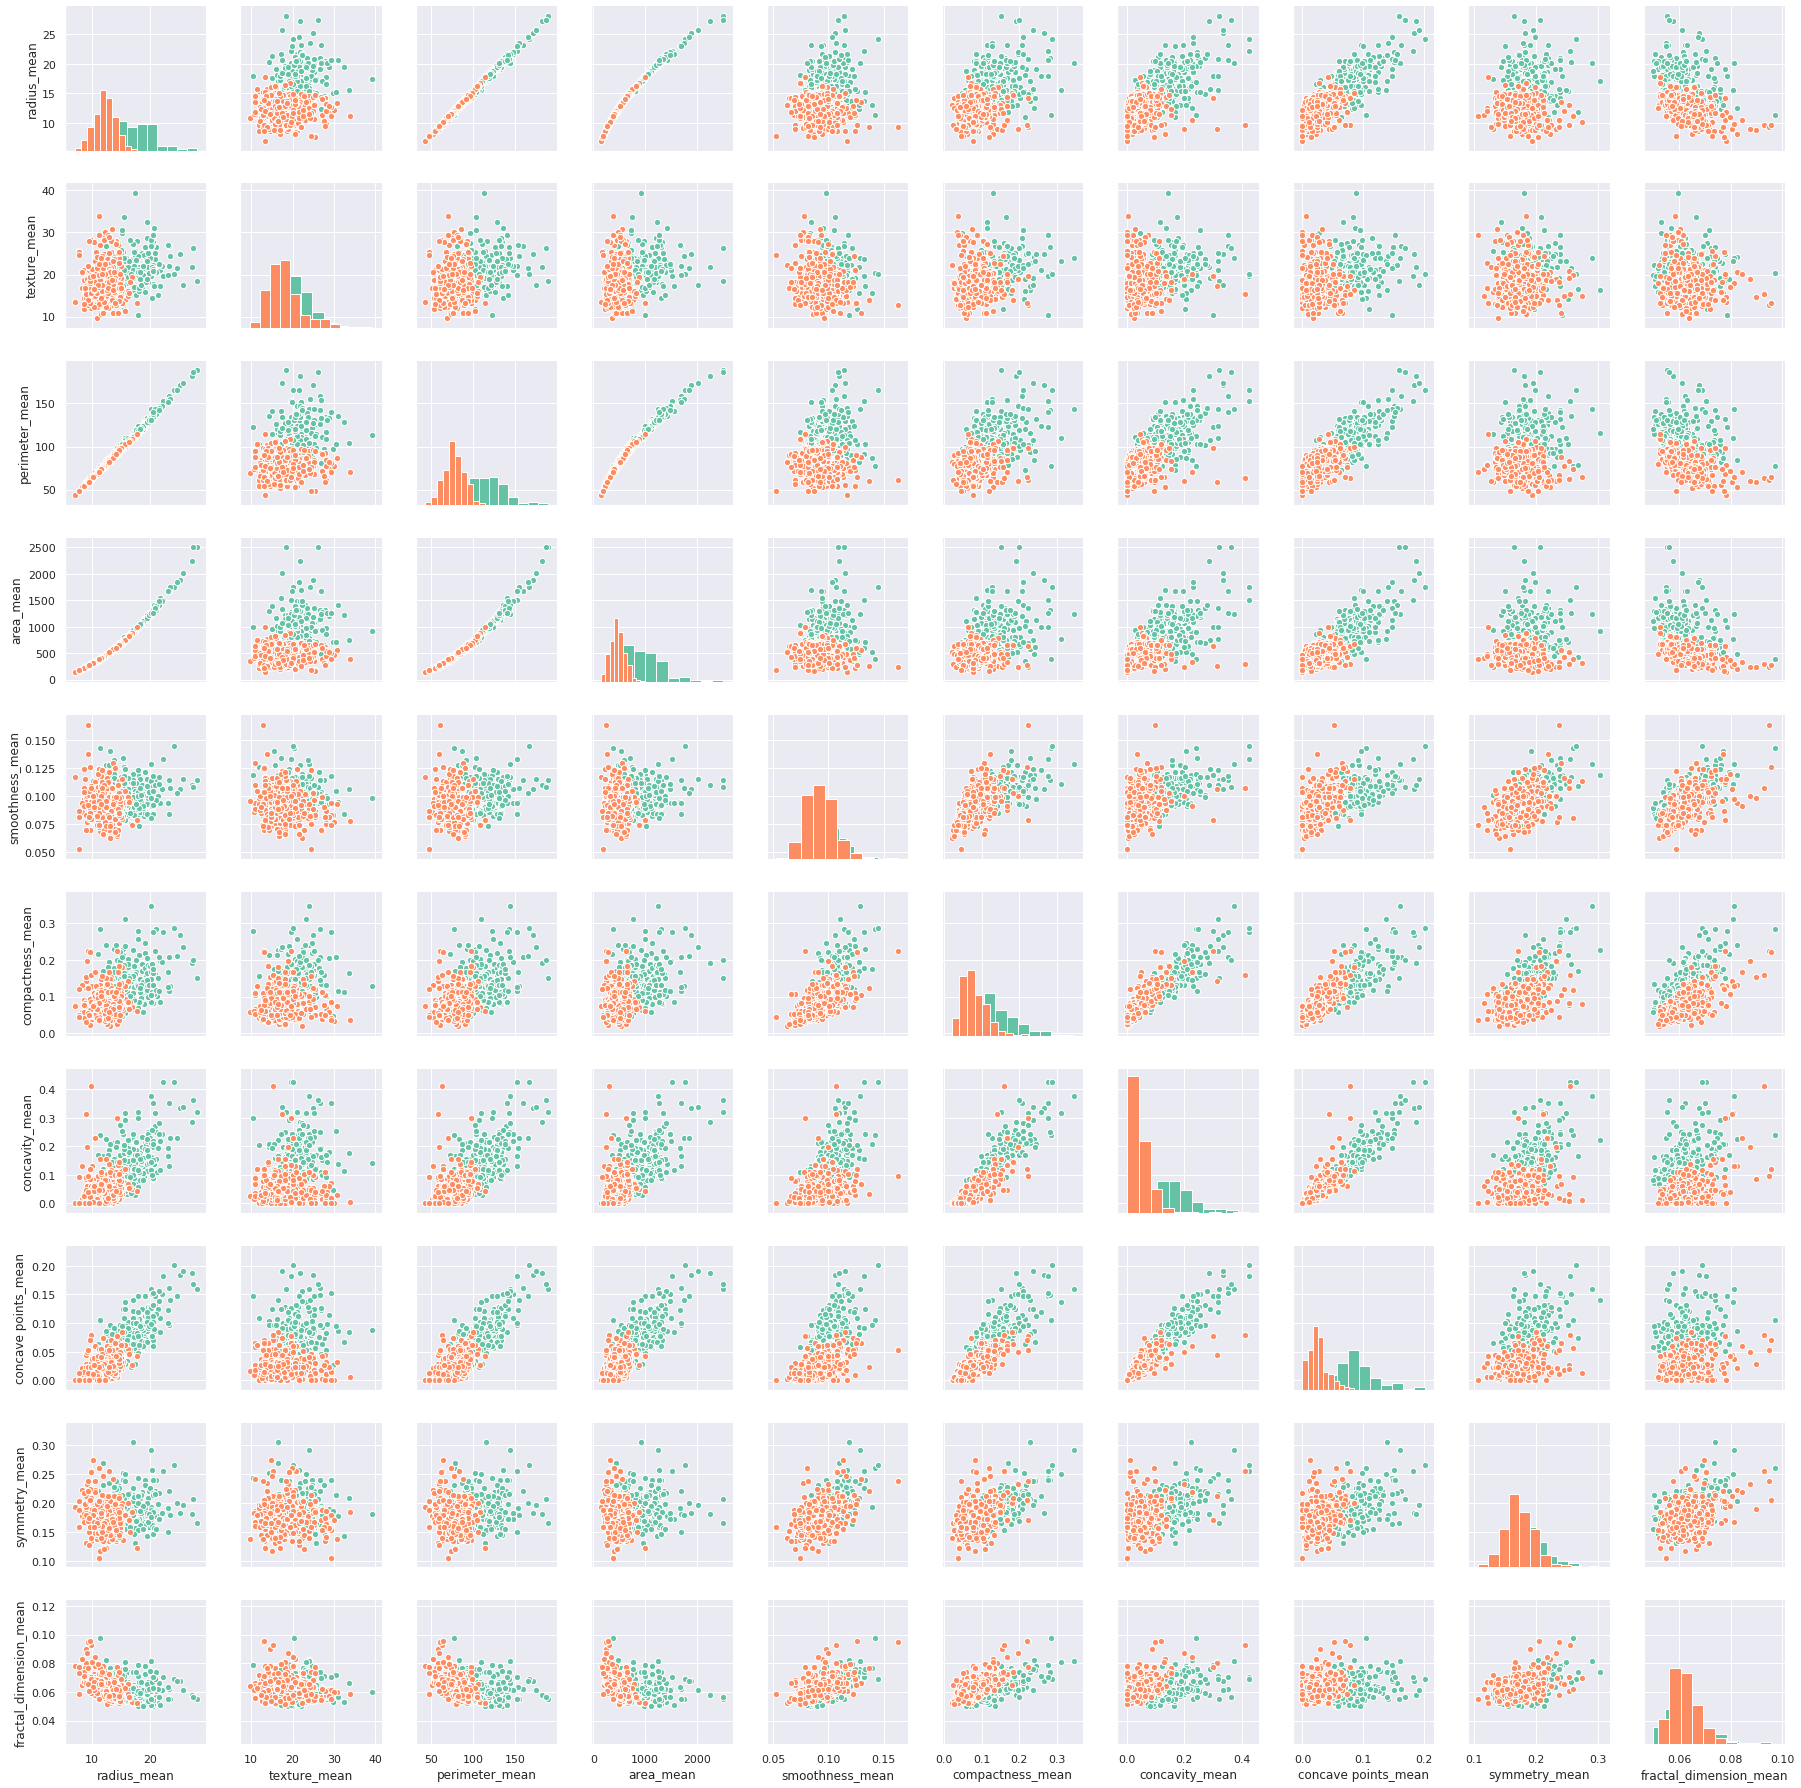

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g = sns.PairGrid(df.iloc[:, 0:11], hue="diagnosis", palette="Set2")
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40);


It seems that there are strong correlations between many variables. Next, a heatmap will be used to present the numerical correlations.

The univariate distributions on the diagonal show a separation of malignant and benign cells for several mean features. Malignant cells tend to have larger mean values of:
radius
perimeter
area
compactness
concavity
concave points

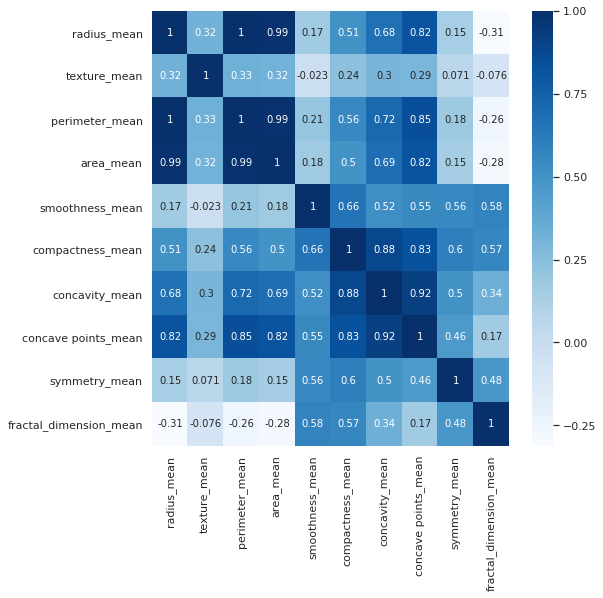

In [0]:
df_corr = df.iloc[:, 1:11].corr()
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, cmap="Blues", annot=True);


Very strong correlations between radius, perimeter and area.

Compactness, concavity and and concave points are also highly correlated.

These highly correlated features result in redundant information. 

We can remove highly correlated features to avoid a predictive bias for the information contained in these features.



#### Machine Learning

Split Data to Train/Test Sets

Create train/test sets using the train_test_split function. The test_size=0.3 inside the function indicates the percentage of the data that should be held over for testing.

In [0]:
from sklearn.model_selection import train_test_split

array = df.values

# Define the independent variables as features.
features = array[:,1:]

# Define the target (dependent) variable as labels.
labels = array[:,0]

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                            random_state=42)

# Check the split printing the shape of each set.
print(features_train.shape, labels_train.shape)
print(features_test.shape, labels_test.shape)

(398, 30) (398,)
(171, 30) (171,)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time

def print_ml_results():
    t0 = time()

    # Create classifier.
    clf = LogisticRegression()

    # Fit the classifier on the training features and labels.
    t0 = time()
    clf.fit(features_train, labels_train)
    print("Training time:", round(time()-t0, 3), "s")

    # Make predictions.
    t1 = time()
    predictions = clf.predict(features_test)
    print("Prediction time:", round(time()-t1, 3), "s")

    # Evaluate the model.
    accuracy = clf.score(features_test, labels_test)
    report = classification_report(labels_test, predictions)

    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy))
    print("\n", report)
    print(confusion_matrix(labels_test, predictions))

print_ml_results()

Training time: 0.009 s
Prediction time: 0.0 s

Report:

Accuracy: 0.9649122807017544

               precision    recall  f1-score   support

           B       0.96      0.98      0.97       108
           M       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[106   2]
 [  4  59]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Principal Component Analysis (PCA) step

PCA is used as a preprocessing step

The main purpose of principal component analysis is to:

- identify hidden pattern in a data  
- reduce the dimensionnality of the data by removing the noise and redundant features
- identify correlated variables  


In [0]:
# scale features 
from sklearn.preprocessing import MinMaxScaler
import numpy as np

array = df.values

# Define the independent variables as features.
features = array[:,1:]

np.set_printoptions(precision=2, suppress=True)

scaler = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler.fit_transform(features)
print("Unscaled data\n", features_train)
print("\nScaled data\n", features_scaled)

Unscaled data
 [[13.74 17.91 88.12 ... 0.06019 0.235 0.07014]
 [13.37 16.39 86.1 ... 0.08978 0.2048 0.07628]
 [14.69 13.98 98.22 ... 0.1108 0.2827 0.09208]
 ...
 [14.29 16.82 90.3 ... 0.03333 0.2458 0.0612]
 [13.98 19.62 91.12 ... 0.1827 0.3179 0.1055]
 [12.18 20.52 77.22 ... 0.07431 0.2694 0.06878]]

Scaled data
 [[0.52 0.02 0.55 ... 0.91 0.6  0.42]
 [0.64 0.27 0.62 ... 0.64 0.23 0.22]
 [0.6  0.39 0.6  ... 0.84 0.4  0.21]
 ...
 [0.46 0.62 0.45 ... 0.49 0.13 0.15]
 [0.64 0.66 0.67 ... 0.91 0.5  0.45]
 [0.04 0.5  0.03 ... 0.   0.26 0.1 ]]


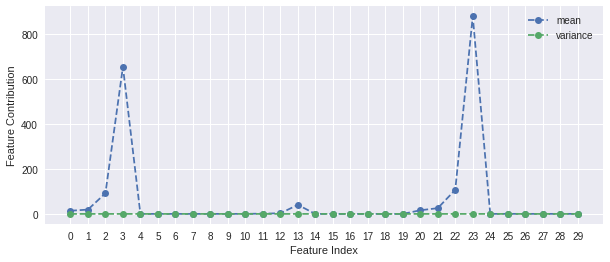

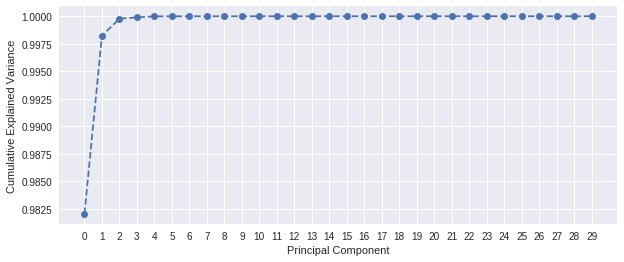

In [0]:
from sklearn.decomposition import PCA

pca = PCA(30)
projected = pca.fit_transform(features)
pca_inversed_data = pca.inverse_transform(np.eye(30))

plt.style.use('seaborn')

def plot_pca():
    plt.figure(figsize=(10, 4))
    plt.plot(pca_inversed_data.mean(axis=0), '--o', label = 'mean')
    plt.plot(np.square(pca_inversed_data.std(axis=0)), '--o', label = 'variance')
    plt.ylabel('Feature Contribution')
    plt.xlabel('Feature Index')
    plt.legend(loc='best')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

    plt.figure(figsize = (10, 4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), '--o')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

plot_pca()

Applying PCA on the unscaled dataset, it seems that more than 99% of the variance is explained by only one component, which is too good to be true. The feature contribution plot depicts that principal components 3 (area_mean) and 23 (area_worst) dominate the PCA. This is explained by the large variance of area_mean and area_worst (see std values of the Data Exploration section). To avoid this, feature scaling prior to PCA is highly recommended.

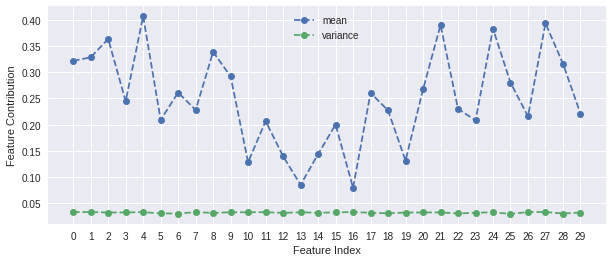

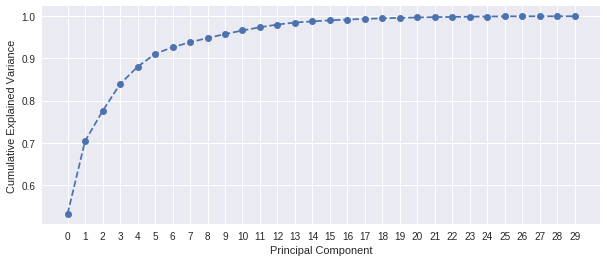

In [0]:
projected_scaled = pca.fit_transform(features_scaled)
pca_inversed_data = pca.inverse_transform(np.eye(30))

plot_pca()

5 principal components are required to explain more than 90% of the variance. This shows a better handle on the variation within the dataset.

In [0]:
# scale features 
from sklearn.preprocessing import MinMaxScaler
import numpy as np

array = df.values

# Define the independent variables as features.
features = array[:,1:]

np.set_printoptions(precision=2, suppress=True)

scaler = MinMaxScaler(feature_range=(0,1))
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.fit_transform(features_test)


In [0]:
def print_m2_results():
    t0 = time()

    # Create classifier.
    clf = LogisticRegression(solver='lbfgs')

    # Fit the classifier on the training features and labels.
    t0 = time()
    clf.fit(features_train_scaled, labels_train)
    print("Training time:", round(time()-t0, 3), "s")

    # Make predictions.
    t1 = time()
    predictions = clf.predict(features_test_scaled)
    print("Prediction time:", round(time()-t1, 3), "s")

    # Evaluate the model.
    accuracy = clf.score(features_test_scaled, labels_test)
    report = classification_report(labels_test, predictions)

    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy))
    print("\n", report)
    print(confusion_matrix(labels_test, predictions))

print_m2_results()

Training time: 0.018 s
Prediction time: 0.0 s

Report:

Accuracy: 0.9473684210526315

               precision    recall  f1-score   support

           B       0.99      0.93      0.96       108
           M       0.89      0.98      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.94       171
weighted avg       0.95      0.95      0.95       171

[[100   8]
 [  1  62]]
